<a href="https://colab.research.google.com/github/kelvinsima2/Cybersecurity-Data-Science/blob/main/NSL_KDD_Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preamble

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Retrieval from Drive

In [ ]:
# Connect to drive
# Code adapted from [21COP528 Lab 8 ]
from google.colab import drive
drive.mount('/content/drive',force_remount=True)



Mounted at /content/drive


In [ ]:
# Define path for csv text files in NSL_KDD
#training data
path_NSL_KDD_train_20 = 'drive/My Drive/Data Science Project/NSL-KDD/KDDTrain+_20Percent.txt'
path_NSL_KDD_test = 'drive/My Drive/Data Science Project/NSL-KDD/KDDTest+.txt'

In [ ]:
pip install skimpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import libraries
import pandas as pd
import numpy as np
from skimpy import clean_columns

# NSLKDD Dataset

In [ ]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

In [ ]:
df_train_20 = pd.read_csv(path_NSL_KDD_train_20, header = None)
df_train_20.columns = columns
df_train_20.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
df_test = pd.read_csv(path_NSL_KDD_test, header = None)
df_test.columns = columns
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


## Data Cleaning

In [ ]:
#Check number of unique values in the attack label column in training dataset
df_train_20['attack'].value_counts()

normal             13449
neptune             8282
ipsweep              710
satan                691
portsweep            587
smurf                529
nmap                 301
back                 196
teardrop             188
warezclient          181
pod                   38
guess_passwd          10
warezmaster            7
buffer_overflow        6
imap                   5
rootkit                4
multihop               2
phf                    2
ftp_write              1
land                   1
loadmodule             1
spy                    1
Name: attack, dtype: int64

In [ ]:
#Check number of unique values in the attack label column in testing dataset
df_test['attack'].value_counts()

normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: attack, dtype: int64

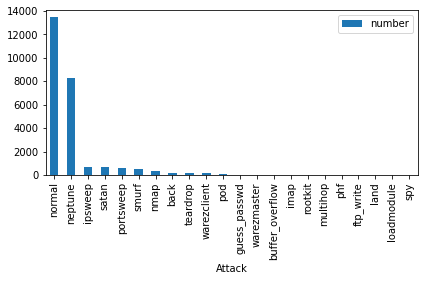

In [ ]:
# Visualize types of attacks in the training dataset and their quantities
import matplotlib.pyplot as plt

attacks_df = df_train_20['attack'].value_counts().to_frame().reset_index()
attacks_df.rename(columns={"index": "attack", "attack": "number",}, inplace = True)
attacks_df.set_index('attack', inplace = True)
attacks_df.plot (kind = "bar")
plt.xlabel('Attack')
plt.tight_layout()
plt.savefig('nsl-kdd-train-attacks.png')

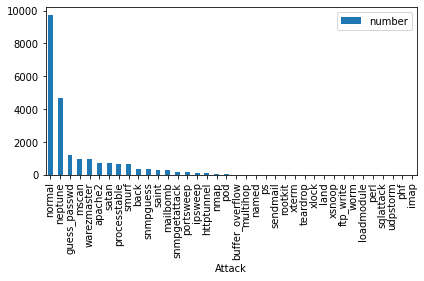

In [ ]:
# Visualize types of attacks in the test dataset and their quantities
import matplotlib.pyplot as plt

attacks_df = df_test['attack'].value_counts().to_frame().reset_index()
attacks_df.rename(columns={"index": "attack", "attack": "number",}, inplace = True)
attacks_df.set_index('attack', inplace = True)
attacks_df.plot (kind = "bar")
plt.xlabel('Attack')
plt.tight_layout()
plt.savefig('nsl-kdd-test-attacks.png')

In [ ]:
# Group attack column to fewer attack categories
# Code adapted from [https://pythonguides.com/pandas-replace-multiple-values/]


df_train_20["attack"] = df_train_20["attack"].replace(dict.fromkeys(['neptune', 'satan', 'ipsweep', 'portsweep', 'smurf', 'nmap', 'back', 'teardrop', 
                                                               'warezclient', 'pod', 'guess_passwd', 'buffer_overflow', 'warezmaster', 'land', 
                                                               'imap', 'rootkit', 'loadmodule', 'ftp_write', 'multihop', 'phf', 'perl', 'spy'], 'attack'))

df_test["attack"] = df_test["attack"].replace(dict.fromkeys(['neptune', 'satan', 'ipsweep', 'portsweep', 'smurf', 'nmap', 'back', 'teardrop', 
                                                               'warezclient', 'pod', 'guess_passwd', 'buffer_overflow', 'warezmaster', 'land', 
                                                               'imap', 'rootkit', 'loadmodule', 'ftp_write', 'multihop', 'phf', 'perl', 'spy',
                                                               'mscan', 'apache2', 'processtable', 'snmpguess', 'saint', 'mailbomb', 'snmpgetattack',
                                                               'httptunnel', 'named', 'ps', 'sendmail', 'xterm', 'xlock', 'xsnoop', 'worm',
                                                             'sqlattack', 'udpstorm'], 'attack'))

In [ ]:
# confirm attack column only has two classes
print(df_train_20['attack'].value_counts())
df_test['attack'].value_counts()


normal    13449
attack    11743
Name: attack, dtype: int64


attack    12833
normal     9711
Name: attack, dtype: int64

In [ ]:
# Remove infinite values by changing them to nan. Adapted from https://stackoverflow.com/questions/17477979/dropping-infinite-values-from-dataframes-in-pandas
df_train_20.replace([np.inf, -np.inf], np.nan, inplace=True)
df_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# Check for NaN values
print("NaN values in training 20 percent df = " + str(df_train_20.isnull().sum().sum()))
print("NaN values in test df = " + str(df_test.isnull().sum().sum()))

NaN values in training 20 percent df = 0
NaN values in test df = 0


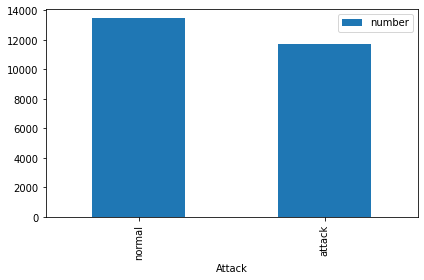

In [ ]:
# Plot labels in training dataset
attacks_df = df_train_20['attack'].value_counts().to_frame().reset_index()
attacks_df.rename(columns={"index": "attack", "attack": "number",}, inplace = True)
attacks_df.set_index('attack', inplace = True)
attacks_df.plot (kind = "bar")
plt.xlabel('Attack')
plt.tight_layout()
plt.savefig('nsl-kdd-train-attacks-categories.png')

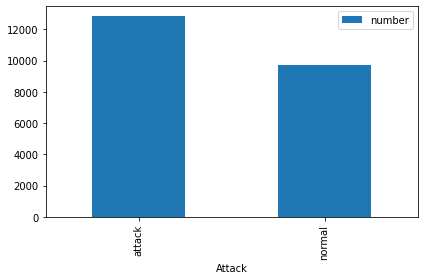

In [ ]:
# Plot labels in testing dataset
attacks_df = df_test['attack'].value_counts().to_frame().reset_index()
attacks_df.rename(columns={"index": "attack", "attack": "number",}, inplace = True)
attacks_df.set_index('attack', inplace = True)
attacks_df.plot (kind = "bar")
plt.xlabel('Attack')
plt.tight_layout()
plt.savefig('nsl-kdd-test-attacks-categories.png')

## Data Normalization and Feature Selection

In [ ]:
# Check which columns have data types as integer, float and object respectively
print("training data : " + str(df_train_20.columns.to_series().groupby(df_train_20.dtypes).groups))
print("test data : " + str(df_test.columns.to_series().groupby(df_test.dtypes).groups))

training data : {int64: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count', 'level'], float64: ['serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'], object: ['protocol_type', 'service', 'flag', 'attack']}
test data : {int64: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file

In [ ]:
# Count Number of Unique values in each object column
columns1 = ['protocol_type', 'service', 'flag']
print("Training:")
for column in columns1:
 print("Number of unique values in " + column + " = " + str(df_train_20[column].nunique()))

print("Testing:")
for column in columns1:
 print("Number of unique values in " + column + " = " + str(df_test[column].nunique()))


Training:
Number of unique values in protocol_type = 3
Number of unique values in service = 66
Number of unique values in flag = 11
Testing:
Number of unique values in protocol_type = 3
Number of unique values in service = 64
Number of unique values in flag = 11


In [ ]:
# Label encode service and flag object columns
# Adapted from [https://pbpython.com/categorical-encoding.html]

string_cols = ['service', 'flag']

for col in string_cols:
  df_train_20[col] = df_train_20[col].astype('category')
  df_train_20[col] = df_train_20[col].cat.codes
  df_test[col] = df_test[col].astype('category')
  df_test[col] = df_test[col].cat.codes
  
  



In [ ]:
# One hot encode protocol type object column
# Adapted from [https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python]

def one_hot_encode(df, column):
  one_hot = pd.get_dummies(df[column])
  # Drop column as it is now encoded
  df= df.drop(column,axis = 1)
  # Join the encoded df
  df = df.join(one_hot)
  return (df)

df_train_20 = one_hot_encode(df_train_20, 'protocol_type')
df_test = one_hot_encode(df_test, 'protocol_type')





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


[1.89752444e-03 1.62258304e-02 5.71075538e-02 1.76025105e-02
 6.20726157e-03 2.36663307e-05 8.03956926e-03 2.99863567e-05
 5.74948969e-03 2.14468210e-04 7.61873256e-02 3.01068686e-03
 1.23009501e-04 3.88232052e-05 4.39053373e-04 1.48787869e-04
 1.27557989e-05 6.26794257e-05 0.00000000e+00 0.00000000e+00
 1.52485776e-03 2.36844745e-02 9.68205221e-03 6.33662556e-02
 4.75238392e-02 1.57003414e-02 2.51979415e-02 9.88708768e-02
 8.77963933e-03 6.50229029e-03 1.46377290e-02 6.12312033e-02
 8.39342896e-02 7.82723821e-03 3.41997359e-02 9.45150034e-03
 6.49028192e-02 6.74480693e-02 1.89745544e-02 1.34919771e-02
 4.88548750e-02 4.80727074e-02 1.63680400e-02 1.66517105e-02]


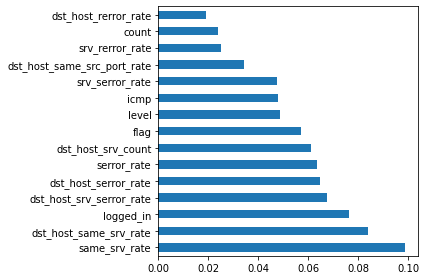

In [ ]:
# separate target and features
# code adapted from [https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e]

y = df_train_20.loc[:, df_train_20.columns == 'attack']
X = df_train_20.loc[:, df_train_20.columns != 'attack']

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

plt.tight_layout()
plt.savefig('NSL-KDD-feature importance.png')
plt.show()

In [ ]:
# Select the top 12 feature columns, then remove the level column
feature_columns = list(dict(feat_importances.nlargest(12)).keys())
feature_columns.remove('level')


In [ ]:
# separate target and features

df_train_target = np.asarray(df_train_20.loc[:, df_train_20.columns == 'attack'])
df_train_features = np.asarray(df_train_20[feature_columns])

In [ ]:
# Normalize features using standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_dftrain_features = scaler.fit_transform(df_train_features)

scaled_dftrain_features

array([[ 0.77210866, -0.7791569 , -0.80762582, ..., -0.26516942,
        -0.63397817,  0.07311974],
       [-1.32056658, -1.15783086, -0.80762582, ..., -0.26516942,
        -0.63397817,  2.37561979],
       [-1.38880599, -0.93508147, -0.80762582, ..., -0.26516942,
         1.60020925, -0.47818309],
       ...,
       [-1.34331305, -1.04645617, -0.80762582, ..., -0.26516942,
        -0.63397817, -0.47818309],
       [-1.18408776, -0.97963135, -0.80762582, ..., -0.26516942,
         1.60020925, -0.47818309],
       [-0.95662306, -0.73460702, -0.80762582, ..., -0.26516942,
         1.60020925, -0.44575351]])

## Split Data

In [ ]:
# Split data into training and testing splits 
from sklearn.model_selection import train_test_split

X = scaled_dftrain_features
y = np.ravel(df_train_target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

# Models

## Catboost Classifier

In [ ]:
# [Adapted from https://towardsdatascience.com/mastering-fast-gradient-boosting-on-google-colaboratory-with-free-gpu-65c1dd47d1c5] 
#Create a Gaussian Classifier
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf= CatBoostClassifier(iterations = 100, learning_rate = 0.03,task_type='CPU')

#Train the model using the training sets
st_train = time.time()
clf.fit(X_train,y_train)
et_train = time.time()

print("Training time = " + str(et_train-st_train) + " seconds")

st_test = time.time()
y_pred=clf.predict(X_test)
et_test = time.time()

print("Testing time = " + str(et_test-st_test) + " seconds")

y_conf=clf.predict_proba(X_test)

y_unique = list(np.unique(y_test))

print(classification_report(y_test, y_pred, labels=y_unique))

cm = confusion_matrix(y_test, y_pred)

0:	learn: 0.6686044	total: 4.55ms	remaining: 450ms
1:	learn: 0.6456428	total: 8.29ms	remaining: 406ms
2:	learn: 0.6236030	total: 12ms	remaining: 387ms
3:	learn: 0.6030190	total: 15.7ms	remaining: 376ms
4:	learn: 0.5832167	total: 19.7ms	remaining: 375ms
5:	learn: 0.5647090	total: 23.7ms	remaining: 371ms
6:	learn: 0.5469179	total: 27.5ms	remaining: 365ms
7:	learn: 0.5299914	total: 36.1ms	remaining: 415ms
8:	learn: 0.5140497	total: 40.2ms	remaining: 406ms
9:	learn: 0.4988715	total: 43.8ms	remaining: 395ms
10:	learn: 0.4841574	total: 47.4ms	remaining: 383ms
11:	learn: 0.4703797	total: 51.1ms	remaining: 374ms
12:	learn: 0.4570036	total: 54.7ms	remaining: 366ms
13:	learn: 0.4446429	total: 58.3ms	remaining: 358ms
14:	learn: 0.4325149	total: 62.5ms	remaining: 354ms
15:	learn: 0.4210933	total: 66.6ms	remaining: 350ms
16:	learn: 0.4099388	total: 70.6ms	remaining: 345ms
17:	learn: 0.3994531	total: 74.6ms	remaining: 340ms
18:	learn: 0.3894057	total: 78.6ms	remaining: 335ms
19:	learn: 0.3797546	tot

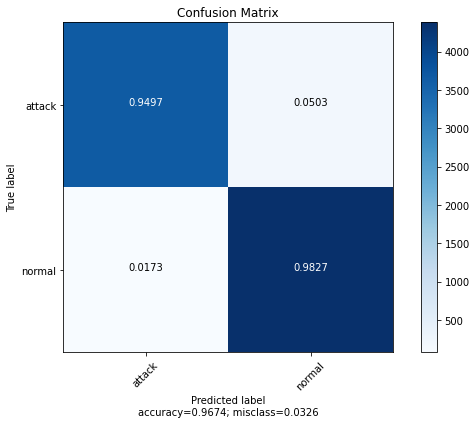

In [ ]:
# code adapted from [http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html]
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    


plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('NSL-KDD train catboost confusion matrix.png')
plt.show()

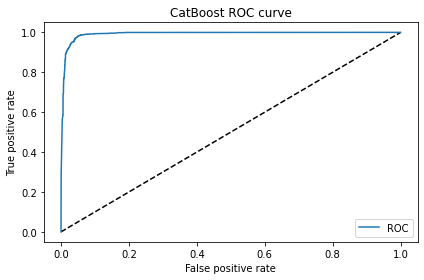

AUC score =  0.9924059548873861


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
 
# Plot ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, y_conf[:,1], pos_label='normal')
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('CatBoost ROC curve')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('trainCatBoost_roc.png')
plt.show()


auc_score = roc_auc_score(y_test, y_conf[:,1])
print("AUC score = ", auc_score)

## K Nearest Neighbour

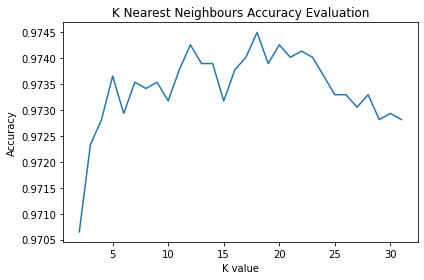

Optimum value: k =  18


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Parameter Tuning
# Create arrays with zeros to store accuracy data.
accuracy_array = np.zeros(30)
k_array = np.zeros(30)

# Loop through models with increasing values of n_neighbours
for k in np.arange(30):
    clf_kNN = KNeighborsClassifier(n_neighbors=k+2, weights='distance')
    clf_kNN.fit(X_train, y_train)
    y_pred=clf_kNN.predict(X_test)

    # Store accuracy in an array
    accuracy_array[k] = accuracy_score(y_test, y_pred)
    k_array[k] = k+2

# Plot accuracy against n_neighbours value.  
plt.plot(k_array, accuracy_array)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('K Nearest Neighbours Accuracy Evaluation')
plt.savefig('KNN_Accuracy.png')
plt.tight_layout()
plt.savefig('nsl-kdd-KNN-parameters.png')
plt.show()

print("Optimum value: k = ", list(accuracy_array).index(max(accuracy_array))+2)

Training time = 0.04905366897583008 seconds
Testing time = 0.6560029983520508 seconds
The classification report for the training set is: 

              precision    recall  f1-score   support

      attack       0.97      0.97      0.97      3856
      normal       0.97      0.98      0.98      4458

    accuracy                           0.97      8314
   macro avg       0.97      0.97      0.97      8314
weighted avg       0.97      0.97      0.97      8314

The confusion matrix for the training set is:



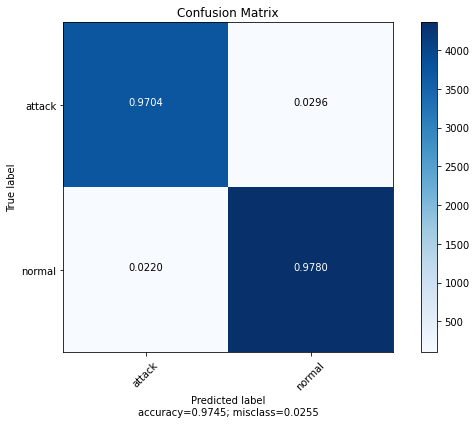

In [ ]:

    
# Use the n_neighbours value with the highest accuracy to make the final model.
clf_kNN = KNeighborsClassifier(n_neighbors=list(accuracy_array).index(max(accuracy_array))+2, weights='distance')
st_train = time.time()
clf_kNN.fit(X_train, y_train)
et_train = time.time()

print("Training time = " + str(et_train-st_train) + " seconds")

st_test = time.time()
y_pred=clf_kNN.predict(X_test)
et_test = time.time()

print("Testing time = " + str(et_test-st_test) + " seconds")

y_conf=clf_kNN.predict_proba(X_test)

# Get classification report of the model.

print('The classification report for the training set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the training set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('NSL-KDD train KNN confusion matrix.png')
plt.show()


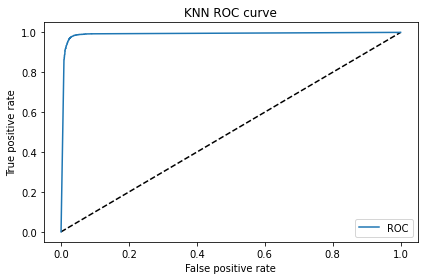

AUC score =  0.9899962466655124


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
 
# Plot ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, y_conf[:,1], pos_label='normal')
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNN ROC curve')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('trainKNN_roc.png')
plt.show()


auc_score = roc_auc_score(y_test, y_conf[:,1])
print("AUC score = ", auc_score)

## Stochastic Gradient Descent




Training time = 0.07253456115722656 seconds
Testing time = 0.0021865367889404297 seconds
The classification report for the training set is: 

              precision    recall  f1-score   support

      attack       0.94      0.93      0.93      3856
      normal       0.94      0.94      0.94      4458

    accuracy                           0.94      8314
   macro avg       0.94      0.94      0.94      8314
weighted avg       0.94      0.94      0.94      8314

The confusion matrix for the training set is:



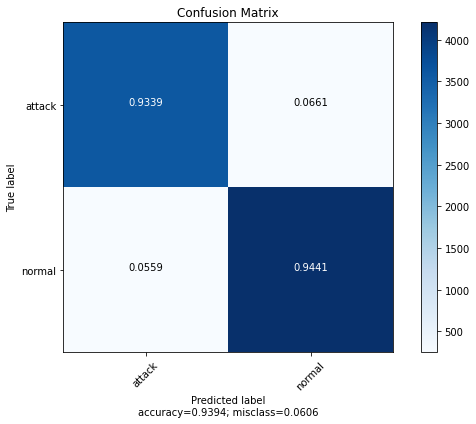

In [ ]:
# probability estimates are not available for loss = hinge, therefore auc/roc may not be calculated
from sklearn.linear_model import SGDClassifier
clf_sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
st_train = time.time()
clf_sgd.fit(X_train, y_train)

et_train = time.time()
print("Training time = " + str(et_train-st_train) + " seconds")

st_test = time.time()
y_pred=clf_sgd.predict(X_test)
et_test = time.time()
print("Testing time = " + str(et_test-st_test) + " seconds")


print('The classification report for the training set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the training set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('NSL-KDD train SGD confusion matrix.png')
plt.show()

## SVM

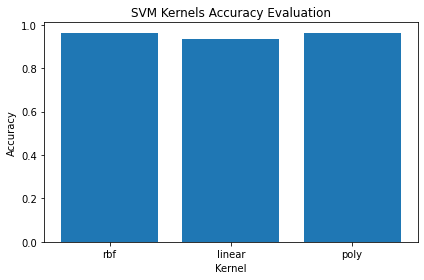

In [ ]:
from sklearn.svm import SVC
from sklearn import svm

kernels = ['rbf', 'linear', 'poly']

# Create array with zeros to store accuracy data.
accuracy_array = np.zeros(3)

# Loop through models with different types of kernels
for i, kernel in enumerate(kernels):
    model = svm.SVC(kernel=kernel)
    clf_svm = model.fit(X_train, y_train)
    y_pred=clf_svm.predict(X_test)
    accuracy_array[i] = accuracy_score(y_test, y_pred)

# Plot bar graph of accuracy of different kernels
plt.bar(kernels, accuracy_array)
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('SVM Kernels Accuracy Evaluation')
plt.tight_layout()
plt.savefig('NSL-KDD-SVM-parameters.png')
plt.show()


Best model =  poly
Training time = 10.275910139083862 seconds
Testing time = 0.45886754989624023 seconds
The classification report for the training set is: 

              precision    recall  f1-score   support

      attack       0.98      0.94      0.96      3856
      normal       0.95      0.98      0.97      4458

    accuracy                           0.96      8314
   macro avg       0.96      0.96      0.96      8314
weighted avg       0.96      0.96      0.96      8314

The confusion matrix for the training set is:



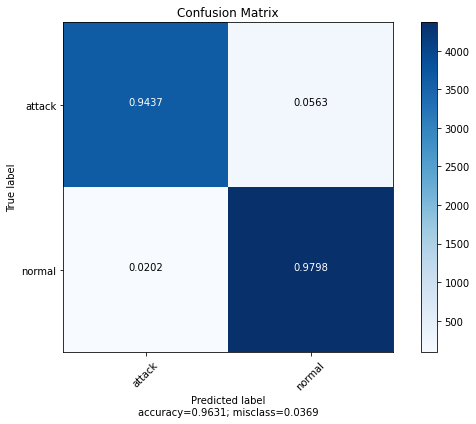

In [ ]:

# Take the best kernel and use it to make the final SVM model 
print("Best model = ", kernels[list(accuracy_array).index(max(accuracy_array))])
model = svm.SVC(kernel=kernels[list(accuracy_array).index(max(accuracy_array))], probability = True)
st_train = time.time()
clf_svm = model.fit(X_train, y_train)
et_train = time.time()

print("Training time = " + str(et_train-st_train) + " seconds")

st_test = time.time()
y_pred=clf_svm.predict(X_test)
et_test = time.time()
print("Testing time = " + str(et_test-st_test) + " seconds")

y_conf=clf_svm.predict_proba(X_test)

print('The classification report for the training set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the training set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('NSL-KDD train SVM confusion matrix.png')
plt.show()


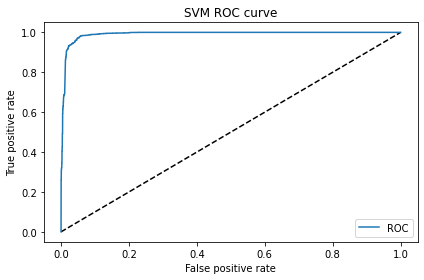

AUC score =  0.9909501125302268


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
 
# Plot ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, y_conf[:,1], pos_label='normal')
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('trainSVM_roc.png')
plt.show()



auc_score = roc_auc_score(y_test, y_conf[:,1])
print("AUC score = ", auc_score)

## AdaBoost

Training time = 4.388610363006592 seconds
Testing time = 0.15690159797668457 seconds
The classification report for the training set is: 

              precision    recall  f1-score   support

      attack       0.97      0.96      0.97      3856
      normal       0.97      0.98      0.97      4458

    accuracy                           0.97      8314
   macro avg       0.97      0.97      0.97      8314
weighted avg       0.97      0.97      0.97      8314

The confusion matrix for the training set is:



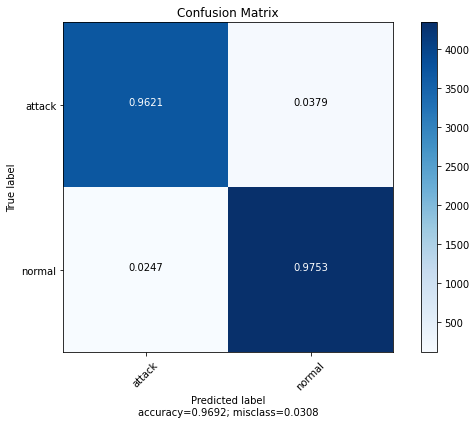

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Create AdaBoost classifier model with decision tree as base estimator
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=1)
clf_A = AdaBoostClassifier(n_estimators=100, random_state=0,
                                   base_estimator=dtree,
                                   learning_rate=0.0005,
                                   algorithm = 'SAMME')
st_train = time.time()
clf_A.fit(X_train, y_train)
et_train = time.time()

print("Training time = " + str(et_train-st_train) + " seconds")

st_test = time.time()
y_pred = clf_A.predict(X_test)
et_test = time.time()

print("Testing time = " + str(et_test-st_test) + " seconds")

y_conf=clf_A.predict_proba(X_test)


print('The classification report for the training set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the training set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('NSL-KDD train Adaboost confusion matrix.png')
plt.show()


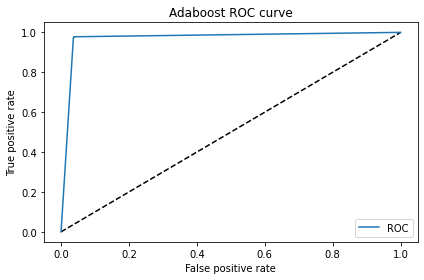

AUC score =  0.9707141597277681


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
 
# Plot ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, y_conf[:,1], pos_label='normal')
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Adaboost ROC curve')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('trainAdaboost_roc.png')
plt.show()


auc_score = roc_auc_score(y_test, y_conf[:,1])
print("AUC score = ", auc_score)

## Decision Tree

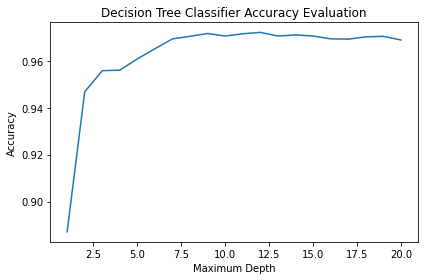

Optimum value: max depth =  12
Training time = 0.04945993423461914 seconds
Testing time = 0.0033342838287353516 seconds
The classification report for the training set is: 

              precision    recall  f1-score   support

      attack       0.98      0.96      0.97      3856
      normal       0.97      0.98      0.97      4458

    accuracy                           0.97      8314
   macro avg       0.97      0.97      0.97      8314
weighted avg       0.97      0.97      0.97      8314

The confusion matrix for the training set is:



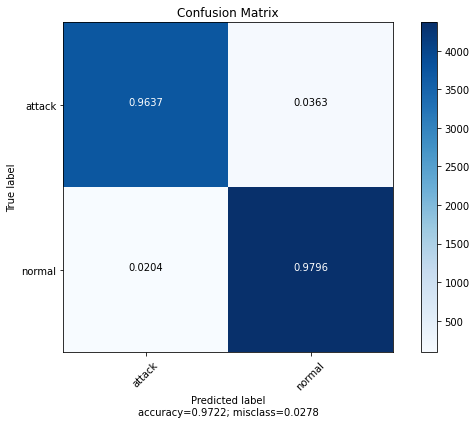

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Create zero arrays to store accuracy and depth values.
accuracy_array = np.zeros(20)
depth_array = np.zeros(20)

# Loop through models with different values of max_depth
for depth in np.arange(20):
    model_tree = DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=depth+1, min_samples_leaf=2)
    model_tree.fit(X_train,y_train) 
    y_pred = model_tree.predict(X_test)
    # Store accuracy and depth values in arrats
    depth_array[depth] = depth + 1
    accuracy_array[depth] = accuracy_score(y_test, y_pred)

# Plot accuracy against max_depth 
plt.plot(depth_array, accuracy_array)
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Accuracy Evaluation')
plt.tight_layout()
plt.savefig('NSL-KDD-Dtree-parameters.png')
plt.show()

# Obtain best depth.
good_depth = list(accuracy_array).index(max(accuracy_array))+1

print("Optimum value: max depth = ", good_depth)

# Create final decision tree model using best depth
model_tree = DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=good_depth, min_samples_leaf=2)
st_train = time.time()
model_tree.fit(X_train,y_train) 
et_train = time.time()

print("Training time = " + str(et_train-st_train) + " seconds")

st_test = time.time()
y_pred = model_tree.predict(X_test)
et_test = time.time()
print("Testing time = " + str(et_test-st_test) + " seconds")

y_conf=model_tree.predict_proba(X_test)


# Get classification report and confusion matrix
print('The classification report for the training set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the training set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('NSL-KDD train Dtree confusion matrix.png')
plt.show()



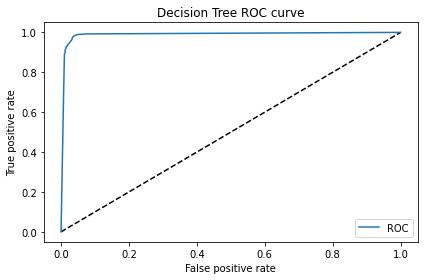

AUC score =  0.9890849344923295


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
 
# Plot ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, y_conf[:,1], pos_label='normal')
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree ROC curve')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('trainDtree_roc.png')
plt.show()


auc_score = roc_auc_score(y_test, y_conf[:,1])
print("AUC score = ", auc_score)

## Random Forest

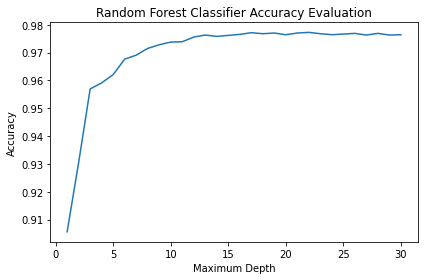

Optimum value: max depth =  22


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create zero arrays to store accuracy and depth values.
accuracy_array = np.zeros(30)
depth_array = np.zeros(30)

# Loop through models with different values of max_depth
for depth in np.arange(30):
    clf_rf = RandomForestClassifier(random_state=0, max_depth=depth+1, )
    clf_rf.fit(X_train,y_train) 
    y_pred = clf_rf.predict(X_test)
   
    # Store accuracy and depth values in arrays
    depth_array[depth] = depth + 1
    accuracy_array[depth] = accuracy_score(y_test, y_pred)

# Plot accuracy against max_depth 
plt.plot(depth_array, accuracy_array)
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy Evaluation')
plt.tight_layout()
plt.savefig('NSL-KDD-RF-parameters.png')
plt.show()

# Obtain best depth.
good_depth = list(accuracy_array).index(max(accuracy_array))+1

print("Optimum value: max depth = ", good_depth)

Training time = 0.987619161605835 seconds
Testing time = 0.11542201042175293 seconds
The classification report for the training set is: 

              precision    recall  f1-score   support

      attack       0.98      0.97      0.98      3856
      normal       0.98      0.98      0.98      4458

    accuracy                           0.98      8314
   macro avg       0.98      0.98      0.98      8314
weighted avg       0.98      0.98      0.98      8314

The confusion matrix for the training set is:



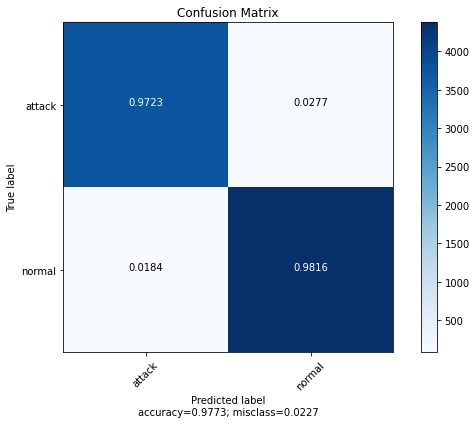

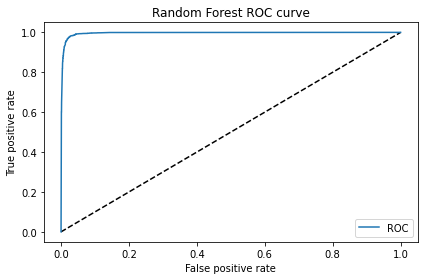

AUC score =  0.9962950656100553


In [ ]:
clf_rf = RandomForestClassifier(max_depth=good_depth, random_state=0)

st_train = time.time()
clf_rf.fit(X_train,y_train) 
et_train = time.time()

print("Training time = " + str(et_train-st_train) + " seconds")

st_test = time.time()
y_pred = clf_rf.predict(X_test)
et_test = time.time()

print("Testing time = " + str(et_test-st_test) + " seconds")

y_conf=clf_rf.predict_proba(X_test)

# Get classification report and confusion matrix
print('The classification report for the training set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the training set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('NSL-KDD train RF confusion matrix.png')
plt.show()

# Plot ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, y_conf[:,1], pos_label='normal')
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('trainRF_roc.png')
plt.show()


auc_score = roc_auc_score(y_test, y_conf[:,1])
print("AUC score = ", auc_score)

## Naive Bayes

Training time = 0.04958629608154297 seconds
Testing time = 0.004146575927734375 seconds
The classification report for the training set is: 

              precision    recall  f1-score   support

      attack       0.93      0.92      0.93      3856
      normal       0.93      0.94      0.94      4458

    accuracy                           0.93      8314
   macro avg       0.93      0.93      0.93      8314
weighted avg       0.93      0.93      0.93      8314

The confusion matrix for the training set is:



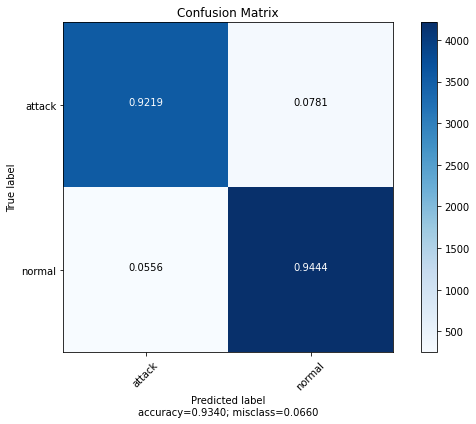

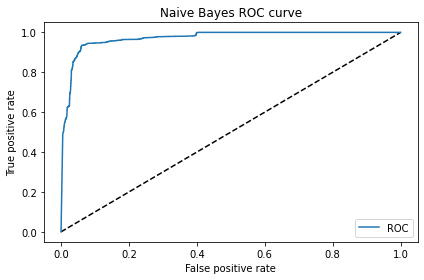

AUC score =  0.9710141879766712


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

st_train = time.time()
gnb.fit(X_train,y_train) 
et_train = time.time()

print("Training time = " + str(et_train-st_train) + " seconds")

st_test = time.time()
y_pred = gnb.predict(X_test)
et_test = time.time()

print("Testing time = " + str(et_test-st_test) + " seconds")

y_conf=gnb.predict_proba(X_test)

# Get classification report and confusion matrix
print('The classification report for the training set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the training set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('NSL-KDD train GNB confusion matrix.png')
plt.show()

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
 
# Plot ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, y_conf[:,1], pos_label="normal")
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Naive Bayes ROC curve')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('trainGNB_roc.png')
plt.show()
auc_score = roc_auc_score(y_test, y_conf[:,1])
print("AUC score = ", auc_score)


## MLP

In [ ]:

from sklearn.neural_network import MLPClassifier

# separate target and features

target = df_train_20.loc[:, df_train_20.columns == 'attack']
features = df_train_20.loc[:, df_train_20.columns != 'attack']

# Normalize features using standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)


# Split data into training and testing splits 
from sklearn.model_selection import train_test_split

X = features
y = np.ravel(target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



Training time = 12.215404510498047 seconds
Testing time = 0.04255938529968262 seconds
The classification report for the training set is: 

              precision    recall  f1-score   support

      attack       0.80      0.83      0.81      3856
      normal       0.85      0.83      0.84      4458

    accuracy                           0.83      8314
   macro avg       0.82      0.83      0.83      8314
weighted avg       0.83      0.83      0.83      8314

The confusion matrix for the training set is:



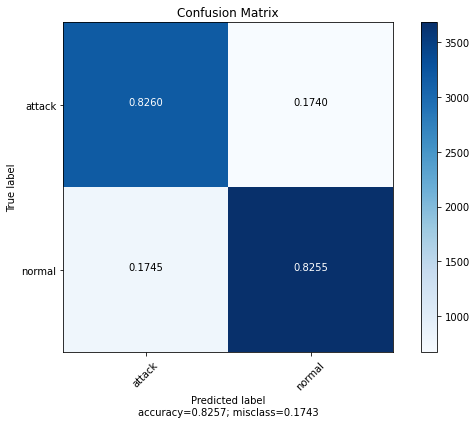

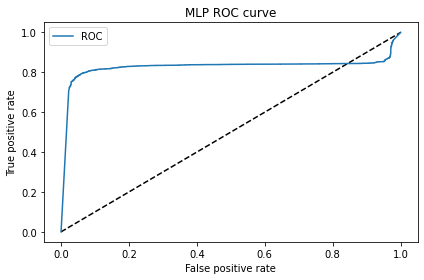

AUC score =  0.8271210761017074


In [ ]:
#Initializing the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)


#Fitting the training data to the network
st_train = time.time()
mlp.fit(X_train, y_train)
et_train = time.time()

print("Training time = " + str(et_train-st_train) + " seconds")

st_test = time.time()
y_pred = mlp.predict(X_test)
et_test = time.time()

print("Testing time = " + str(et_test-st_test) + " seconds")

y_conf=mlp.predict_proba(X_test)

# Get classification report and confusion matrix
print('The classification report for the training set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the training set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('NSL-KDD train MLP confusion matrix.png')
plt.show()

# Plot ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, y_conf[:,1], pos_label="normal")
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('MLP ROC curve')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('trainMLP_roc.png')
plt.show()
auc_score = roc_auc_score(y_test, y_conf[:,1])
print("AUC score = ", auc_score)



# Test with Test data

In [ ]:
test_target = np.asarray(df_test.loc[:, df_test.columns == 'attack'])
test_features = np.asarray(df_test[feature_columns])

X_test = scaler.fit_transform(test_features)
y_test = np.ravel(test_target)

Testing time = 0.019687175750732422 seconds
              precision    recall  f1-score   support

      attack       0.95      0.65      0.77     12833
      normal       0.67      0.95      0.79      9711

    accuracy                           0.78     22544
   macro avg       0.81      0.80      0.78     22544
weighted avg       0.83      0.78      0.78     22544



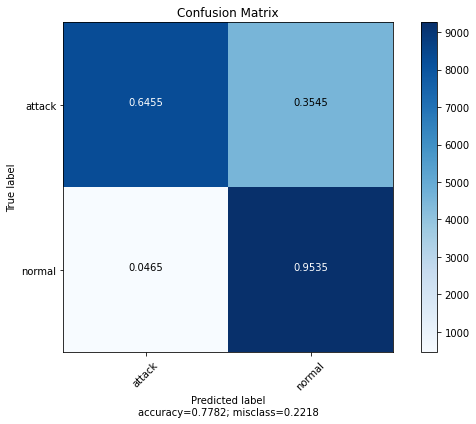

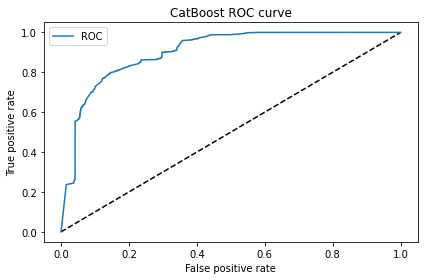

AUC score =  0.9019569316995286


In [ ]:
# Catboost
st_test = time.time()
y_pred=clf.predict(X_test)
et_test = time.time()

print("Testing time = " + str(et_test-st_test) + " seconds")

y_conf=clf.predict_proba(X_test)
print(classification_report(y_test, y_pred, labels=y_unique))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('NSL-KDD test catboost confusion matrix.png')
plt.show()

# Plot ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, y_conf[:,1], pos_label='normal')
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('CatBoost ROC curve')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('testcatboost_roc.png')
plt.show()


auc_score = roc_auc_score(y_test, y_conf[:,1])
print("AUC score = ", auc_score)


Testing time = 2.610921859741211 seconds
The classification report for the testing set is: 

              precision    recall  f1-score   support

      attack       0.95      0.67      0.78     12833
      normal       0.68      0.96      0.80      9711

    accuracy                           0.79     22544
   macro avg       0.82      0.81      0.79     22544
weighted avg       0.84      0.79      0.79     22544

The confusion matrix for the testing set is:



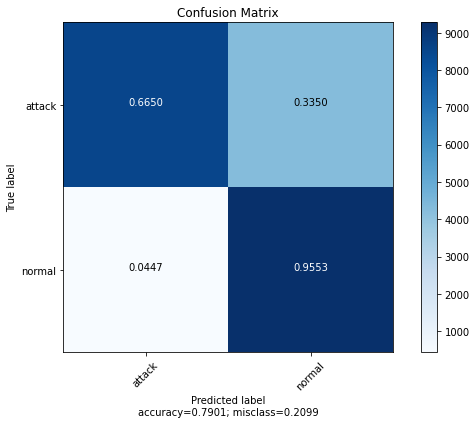

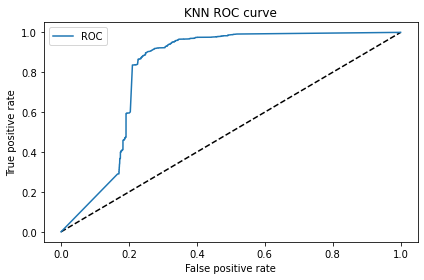

AUC score =  0.8174955825957244


In [ ]:
# KNN
st_test = time.time()
y_pred=clf_kNN.predict(X_test)
et_test = time.time()

print("Testing time = " + str(et_test-st_test) + " seconds")

# Get classification report of the model.

print('The classification report for the testing set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the testing set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('NSL-KDD test KNN confusion matrix.png')
plt.show()

# Plot ROC curve 
y_conf=clf_kNN.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_conf[:,1], pos_label='normal')
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNN ROC curve')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('testKNN_roc.png')
plt.show()


auc_score = roc_auc_score(y_test, y_conf[:,1])
print("AUC score = ", auc_score)


Testing time = 0.006196260452270508 seconds
The classification report for the testing set is: 

              precision    recall  f1-score   support

      attack       0.96      0.64      0.76     12833
      normal       0.67      0.96      0.79      9711

    accuracy                           0.78     22544
   macro avg       0.81      0.80      0.78     22544
weighted avg       0.83      0.78      0.78     22544

The confusion matrix for the testing set is:



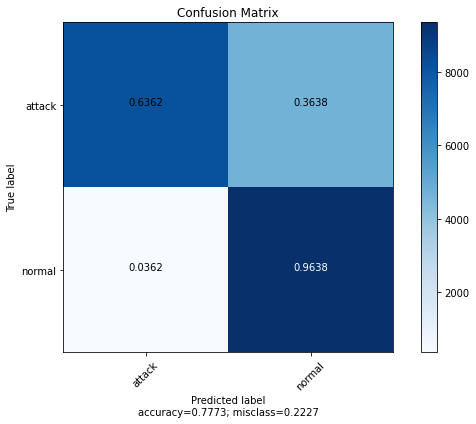

In [ ]:
# Stochastic Gradient Descent
st_test = time.time()
y_pred=clf_sgd.predict(X_test)
et_test = time.time()

print("Testing time = " + str(et_test-st_test) + " seconds")

# Get classification report of the model.

print('The classification report for the testing set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the testing set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('NSL-KDD test SGD confusion matrix.png')
plt.show()



Testing time = 1.2390401363372803 seconds
The classification report for the testing set is: 

              precision    recall  f1-score   support

      attack       0.97      0.62      0.75     12833
      normal       0.66      0.97      0.78      9711

    accuracy                           0.77     22544
   macro avg       0.81      0.79      0.77     22544
weighted avg       0.83      0.77      0.77     22544

The confusion matrix for the testing set is:



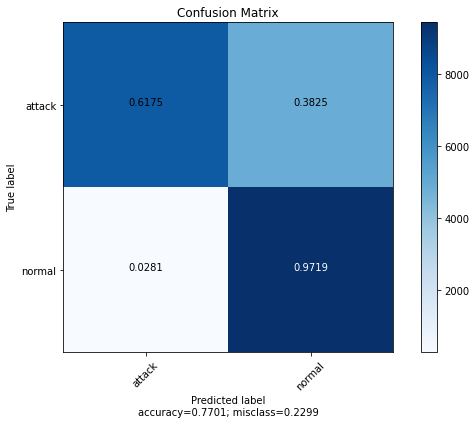

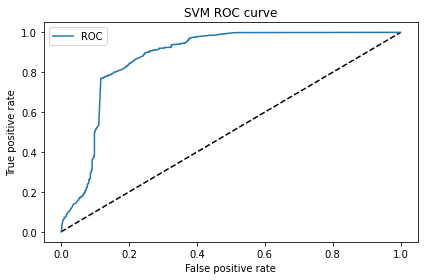

AUC score =  0.8755958965044353


In [ ]:
# SVM
st_test = time.time()
y_pred=clf_svm.predict(X_test)
et_test = time.time()

print("Testing time = " + str(et_test-st_test) + " seconds")

# Get classification report of the model.

print('The classification report for the testing set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the testing set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('NSL-KDD test SVM confusion matrix.png')
plt.show()

# Plot ROC curve 
y_conf=clf_svm.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_conf[:,1], pos_label='normal')
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('testSVM_roc.png')
plt.show()


auc_score = roc_auc_score(y_test, y_conf[:,1])
print("AUC score = ", auc_score)

Testing time = 0.3723325729370117 seconds
The classification report for the testing set is: 

              precision    recall  f1-score   support

      attack       0.91      0.71      0.80     12833
      normal       0.70      0.90      0.79      9711

    accuracy                           0.80     22544
   macro avg       0.81      0.81      0.80     22544
weighted avg       0.82      0.80      0.80     22544

The confusion matrix for the testing set is:



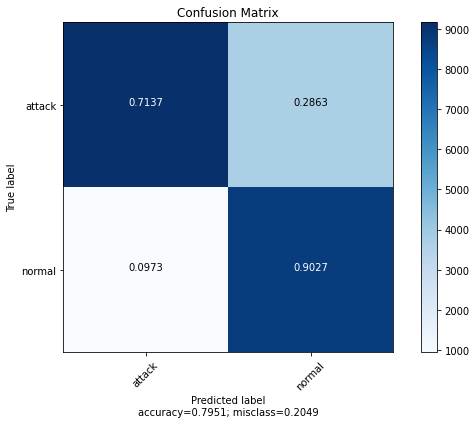

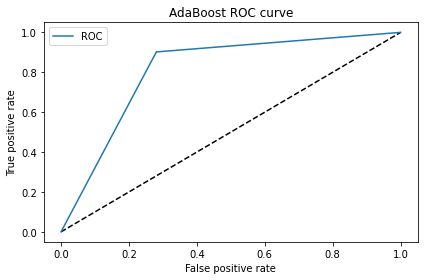

AUC score =  0.8106839721244039


In [ ]:
# AdaBoost
st_test = time.time()
y_pred=clf_A.predict(X_test)
et_test = time.time()

print("Testing time = " + str(et_test-st_test) + " seconds")


# Get classification report of the model.

print('The classification report for the testing set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the testing set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('NSL-KDD test Adaboost confusion matrix.png')
plt.show()

# Plot ROC curve 
y_conf=clf_A.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_conf[:,1], pos_label='normal')
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AdaBoost ROC curve')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('testAdaBoost_roc.png')
plt.show()


auc_score = roc_auc_score(y_test, y_conf[:,1])
print("AUC score = ", auc_score)

Testing time = 0.0034880638122558594 seconds
The classification report for the testing set is: 

              precision    recall  f1-score   support

      attack       0.93      0.63      0.75     12833
      normal       0.65      0.94      0.77      9711

    accuracy                           0.76     22544
   macro avg       0.79      0.78      0.76     22544
weighted avg       0.81      0.76      0.76     22544

The confusion matrix for the testing set is:



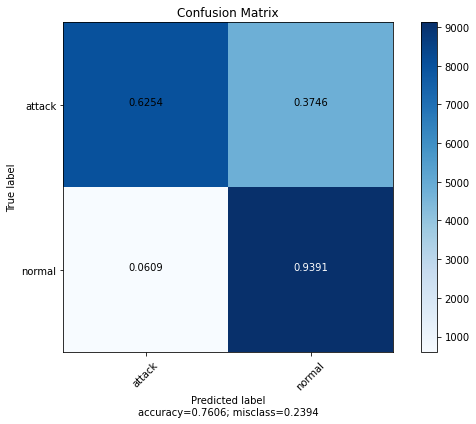

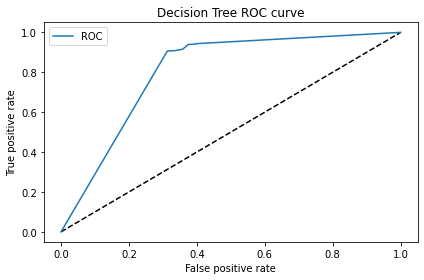

AUC score =  0.8052105321705815


In [ ]:
# Decision Trees
st_test = time.time()
y_pred=model_tree.predict(X_test)
et_test = time.time()

print("Testing time = " + str(et_test-st_test) + " seconds")

# Get classification report of the model.

print('The classification report for the testing set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the testing set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('NSL-KDD test Dtree confusion matrix.png')
plt.show()
# Plot ROC curve 
y_conf=model_tree.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_conf[:,1], pos_label='normal')
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree ROC curve')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('testdtree_roc.png')
plt.show()


auc_score = roc_auc_score(y_test, y_conf[:,1])
print("AUC score = ", auc_score)

Testing time = 0.22484755516052246 seconds
The classification report for the testing set is: 

              precision    recall  f1-score   support

      attack       0.94      0.63      0.75     12833
      normal       0.66      0.95      0.78      9711

    accuracy                           0.76     22544
   macro avg       0.80      0.79      0.76     22544
weighted avg       0.82      0.76      0.76     22544

The confusion matrix for the testing set is:



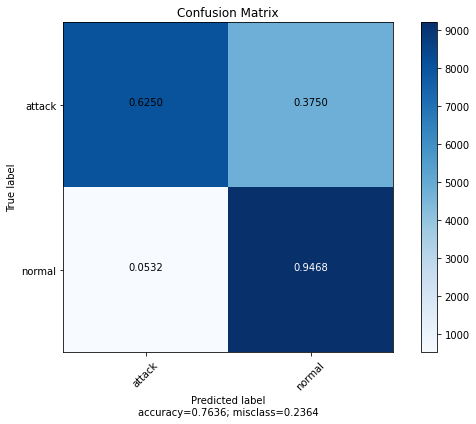

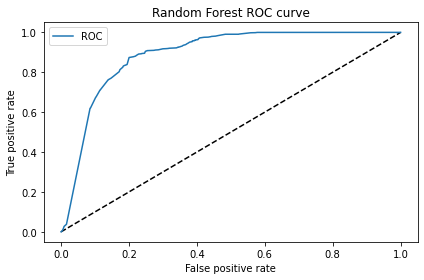

AUC score =  0.8905228315652682


In [ ]:
# Random Forests
st_test = time.time()
y_pred=clf_rf.predict(X_test)
et_test = time.time()

print("Testing time = " + str(et_test-st_test) + " seconds")

# Get classification report of the model.

print('The classification report for the testing set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the testing set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('NSL-KDD test RF confusion matrix.png')
plt.show()

# Plot ROC curve 
y_conf=clf_rf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_conf[:,1], pos_label='normal')
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('testRF_roc.png')
plt.show()


auc_score = roc_auc_score(y_test, y_conf[:,1])
print("AUC score = ", auc_score)

Testing time = 0.006850242614746094 seconds
The classification report for the testing set is: 

              precision    recall  f1-score   support

      attack       0.95      0.69      0.80     12833
      normal       0.70      0.96      0.81      9711

    accuracy                           0.80     22544
   macro avg       0.83      0.82      0.80     22544
weighted avg       0.84      0.80      0.80     22544

The confusion matrix for the testing set is:



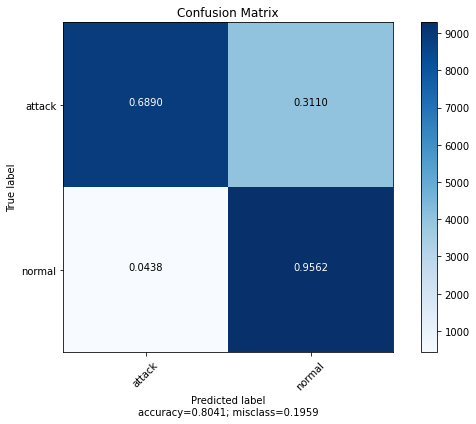

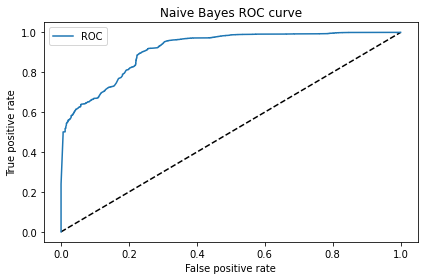

AUC score =  0.9144064203554092


In [ ]:
# Naive Bayes
st_test = time.time()
y_pred=gnb.predict(X_test)
et_test = time.time()

print("Testing time = " + str(et_test-st_test) + " seconds")

# Get classification report of the model.

print('The classification report for the testing set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the testing set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('NSL-KDD test GNB confusion matrix.png')
plt.show()

# Plot ROC curve 
y_conf=gnb.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_conf[:,1], pos_label='normal')
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Naive Bayes ROC curve')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('testGNB_roc.png')
plt.show()


auc_score = roc_auc_score(y_test, y_conf[:,1])
print("AUC score = ", auc_score)

Testing time = 0.12657785415649414 seconds
The classification report for the testing set is: 

              precision    recall  f1-score   support

      attack       0.79      0.57      0.67     12833
      normal       0.59      0.80      0.68      9711

    accuracy                           0.67     22544
   macro avg       0.69      0.69      0.67     22544
weighted avg       0.70      0.67      0.67     22544

The confusion matrix for the testing set is:



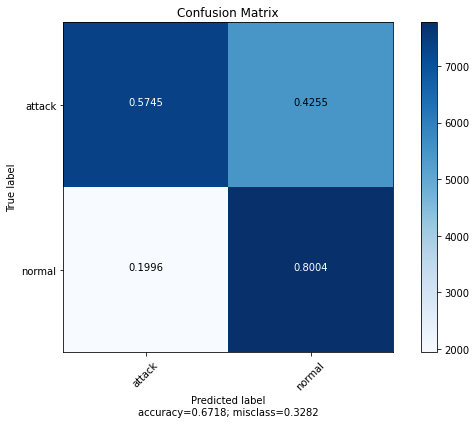

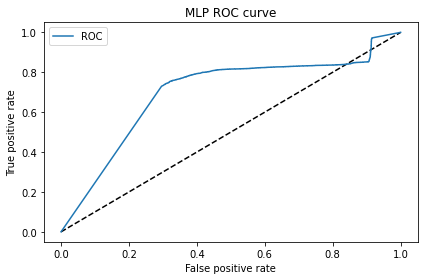

AUC score =  0.6978216189319153


In [ ]:
# MLP

target = df_test.loc[:, df_test.columns == 'attack']
X_test1 = df_test.loc[:, df_test.columns != 'attack']

st_test = time.time()
y_pred=mlp.predict(X_test1)
et_test = time.time()

print("Testing time = " + str(et_test-st_test) + " seconds")

# Get classification report of the model.

print('The classification report for the testing set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the testing set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('NSL-KDD test MLP confusion matrix.png')
plt.show()

# Plot ROC curve 
y_conf=mlp.predict_proba(X_test1)
fpr, tpr, thresholds = roc_curve(y_test, y_conf[:,1], pos_label='normal')
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('MLP ROC curve')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('testmlp_roc.png')
plt.show()


auc_score = roc_auc_score(y_test, y_conf[:,1])
print("AUC score = ", auc_score)